# Heavy traffic on I-94

#### The goal of this project is to analyze data of heavy traffic on interstate 94 to determine the indicators that influence heavy traffic like, weather, time of day and time of the week.
#### The dataset can be found in: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#

####

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline        
sns.set_theme(style="darkgrid")
warnings.filterwarnings("ignore")

In [2]:
traffic = pd.read_csv("C://Users//johng//Desktop//data//Metro_Interstate_Traffic_Volume.csv", encoding="utf-8")

In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [13]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13


In [5]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [6]:
# trasforming the object column to datetime series
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

In [12]:
# creating a new column: hour
traffic["hour"] = traffic["date_time"].dt.hour

In [84]:
# day split from 7 a.m to 7 p.m
range_hours = list(range(7, 19))
traffic_day = traffic.loc[traffic["hour"].isin(range_hours)]
traffic_night = traffic.loc[-(traffic["hour"].isin(range_hours))]

In [85]:
print(sorted(traffic_day['hour'].unique()))

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [86]:
print(sorted(traffic_night['hour'].unique()))

[0, 1, 2, 3, 4, 5, 6, 19, 20, 21, 22, 23]


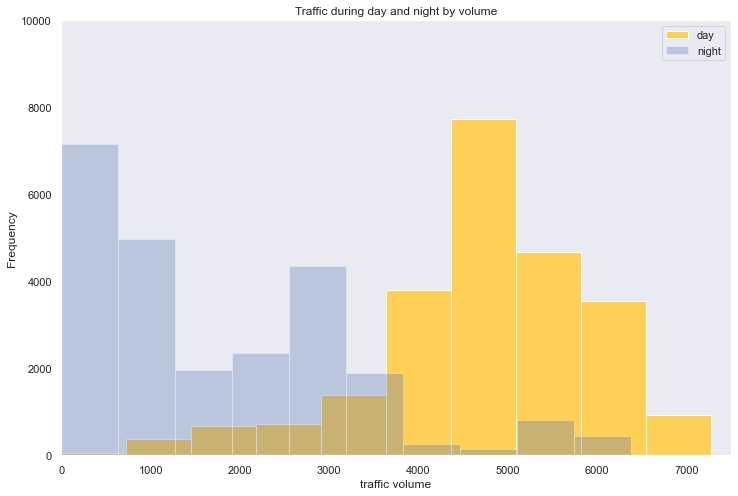

In [77]:
# visualizing daytime and nightime in traffic volume:
traffic_day["traffic_volume"].plot.hist(label="day", color='#FFCF56')
traffic_night["traffic_volume"].plot.hist(label='night', alpha=0.3, grid=False, figsize=(12,8))
plt.xlabel("traffic volume")
plt.title("Traffic during day and night by volume")
plt.legend()
plt.ylim([0, 10000])
plt.xlim([0, 7500])
plt.show()

#### Daytime have influence on the traffic volume.

In [88]:
# traffic volume during the day
traffic_day.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452,12.431419
std,13.298885,63.62932,0.008853,37.564588,1174.546482,3.473405
min,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000,9.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000,12.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000,15.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000,18.000000


In [89]:
# traffic volume during the night
traffic_night.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441,10.384018
std,13.296357,1.110872,0.007434,40.048382,1441.951197,9.029227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000,2.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000,5.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000,20.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000,23.000000


#### Since the volume of traffic during the day is greater than during the night, we are going to continue the analyze for the daytime.

#### Month traffic volume:

In [94]:
traffic_day['month'] = traffic_day['date_time'].dt.month
by_month = traffic_day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

(4300.0, 5000.0)

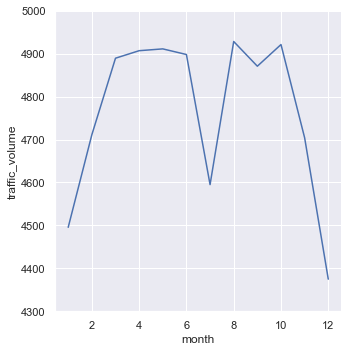

In [104]:
# Plotting the relationship between Traffic Volume and Month of the year
sns.relplot(data = by_month, x = 'month', y = 'traffic_volume', kind = 'line')
plt.ylim([4300,5000])

#### After July the volume starts to increase finding its maximum in August - this is when summer starts and people go on travel because of vacations. At September the volume starts to increase again finding its pick in October - this is when people return to work and school period.

In [110]:
# exploring the data during the day of the week:
traffic_day["by_dayofweek"] = traffic_day["date_time"].dt.dayofweek
by_dayofweek = traffic_day.groupby("by_dayofweek").mean()
by_dayofweek
# 0 is Monday and 6 is Sunday

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,day_of_week
by_dayofweek,,,,,,,,
0,282.262755,2.923823,0.000017,57.508053,4893.551286,12.472732,6.401243,0.0
1,282.301770,0.129172,0.000194,52.333234,5189.004782,12.369994,6.458757,1.0
2,282.198316,0.068099,0.001091,53.662119,5284.454282,12.453411,6.619158,2.0
3,282.279115,0.172436,0.000148,53.993191,5311.303730,12.459739,6.501184,3.0
4,282.181216,0.092828,0.000225,51.412200,5291.600829,12.454545,6.575067,4.0
5,282.300646,0.107596,0.000094,50.446376,3927.249558,12.391573,6.498821,5.0
6,282.280340,0.133170,0.000000,52.288699,3436.541789,12.415244,6.604179,6.0


(3400.0, 5400.0)

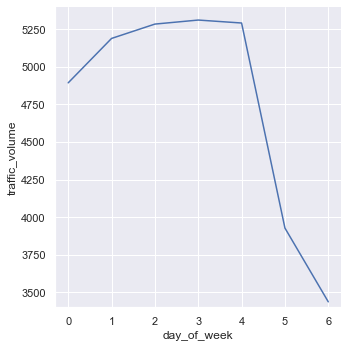

In [116]:
# Plotting the relationship between Traffic Volume and Day of the Week
sns.relplot(data = by_dayofweek, x = 'day_of_week', y = 'traffic_volume', kind = 'line')
plt.ylim([3400,5400])

#### The traffic volume increases from Monday until Friday, where it reachs the maximum value.

## Visualizing the relationship between Time of Day & Avg Traffic Volume

In [117]:
business_days = traffic_day[traffic_day["day_of_week"] <= 4]
weekend = traffic_day[traffic_day["day_of_week"] >= 5]

In [118]:
# Creating groupby Time of Day (Hour) data subset by business days
by_hour_businessdays = business_days.groupby('hour').mean()
by_hour_businessdays.reset_index(inplace=True)
by_hour_businessdays

,hour,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_week,by_dayofweek
0,7,278.662639,0.145105,0.000068,50.538983,6030.413559,6.363390,1.984407,1.984407
1,8,278.938443,0.144614,0.000135,53.666441,5503.497970,6.567659,1.989175,1.989175
2,9,279.628421,0.156829,0.000139,53.619709,4895.269257,6.484386,1.981263,1.981263
3,10,280.664650,0.113984,0.000033,54.781417,4378.419118,6.481283,1.957888,1.957888
4,11,281.850231,0.151976,0.000000,52.808876,4633.419470,6.448819,1.979957,1.979957
5,12,282.832763,0.090271,0.001543,53.855714,4855.382143,6.569286,1.989286,1.989286
6,13,283.292447,0.092433,0.000370,53.325444,4859.180473,6.465237,1.982988,1.982988
7,14,284.091787,0.102991,0.000746,55.326531,5152.995778,6.588318,1.990852,1.990852
8,15,284.450605,0.090036,0.000274,54.168467,5592.897768,6.541397,1.962563,1.962563
9,16,284.399011,0.118180,0.000632,54.444132,6189.473647,6.580464,1.995081,1.995081


In [119]:
# Creating groupby Time of Day (Hour) data by weekends
by_hour_weekends = weekend.groupby('hour').mean()
by_hour_weekends.reset_index(inplace = True)
by_hour_weekends

,hour,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_week,by_dayofweek
0,7,278.095331,0.291540,0.000000,50.006623,1589.365894,6.518212,5.501656,5.501656
1,8,277.981017,0.083870,0.000083,48.877076,2338.578073,6.523256,5.503322,5.503322
2,9,279.785660,0.075234,0.000364,49.688042,3111.623917,6.603120,5.492201,5.492201
3,10,280.403811,0.079674,0.000103,48.915808,3686.632302,6.491409,5.503436,5.503436
4,11,282.129355,0.141387,0.000000,52.372973,4044.154955,6.482883,5.491892,5.491892
5,12,282.936119,0.095784,0.000000,51.418018,4372.482883,6.500901,5.493694,5.493694
6,13,283.784951,0.180452,0.000000,53.095841,4362.296564,6.580470,5.497288,5.497288
7,14,284.663261,0.087847,0.000000,52.735401,4358.543796,6.644161,5.500000,5.500000
8,15,284.854578,0.074771,0.000000,52.148624,4342.456881,6.612844,5.506422,5.506422
9,16,284.755487,0.145894,0.000000,53.630088,4339.693805,6.566372,5.507965,5.507965


Text(0.5, 1.0, 'Hours on Weekends vs Traffic Volume ')

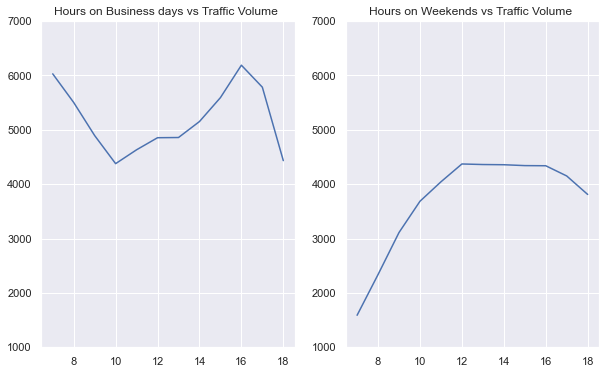

In [120]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.plot(by_hour_businessdays['hour'], by_hour_businessdays['traffic_volume'])
plt.ylim([1000, 7000])
plt.title('Hours on Business days vs Traffic Volume ')


plt.subplot(1,2,2)
plt.plot(by_hour_weekends['hour'], by_hour_weekends['traffic_volume'])
plt.ylim([1000, 7000])
plt.title('Hours on Weekends vs Traffic Volume ')

#### During business days the pick hours are 16 hs and 07 hs. During the weekend the pick hours are 12 and 16. 

In [136]:
traffic_day.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,day_of_week,by_dayofweek
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452,12.431419,6.522218,2.983457,2.983457
std,13.298885,63.62932,0.008853,37.564588,1174.546482,3.473405,3.407585,2.007363,2.007363
min,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000,9.000000,4.000000,1.000000,1.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000,12.000000,7.000000,3.000000,3.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000,15.000000,9.000000,5.000000,5.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000,18.000000,12.000000,6.000000,6.000000


#### Relationship between traffic volume and "rain_1h", "snow_1h" and "clouds_all":

In [132]:
traffic_day["rain_1h"].corr(traffic_day["traffic_volume"])

0.003696509835073453

In [133]:
traffic_day["snow_1h"].corr(traffic_day["traffic_volume"])

0.001265349847175986

In [131]:
traffic_day["clouds_all"].corr(traffic_day["traffic_volume"])

-0.032932348661639514

#### None of these weather columns seem to be reliable indicators for heavy traffic.

#### Relatioship between trafic volume, "wheater_main" and "weather_description"

In [134]:
by_weather_main = traffic_day.groupby('weather_main').mean()
by_weather_description = traffic_day.groupby('weather_description').mean()

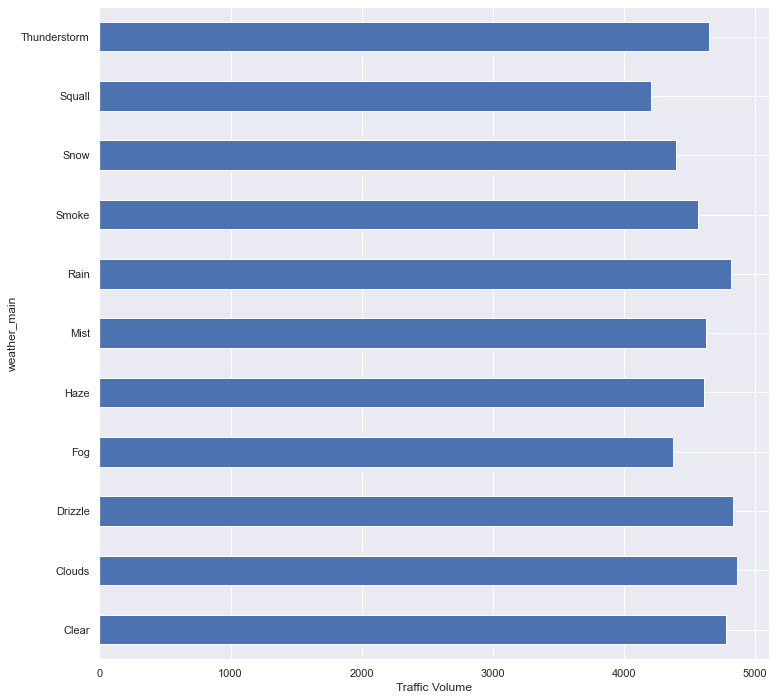

In [146]:
by_weather_main['traffic_volume'].plot.barh(figsize=(12,12))
plt.xlabel('Traffic Volume')
plt.show()

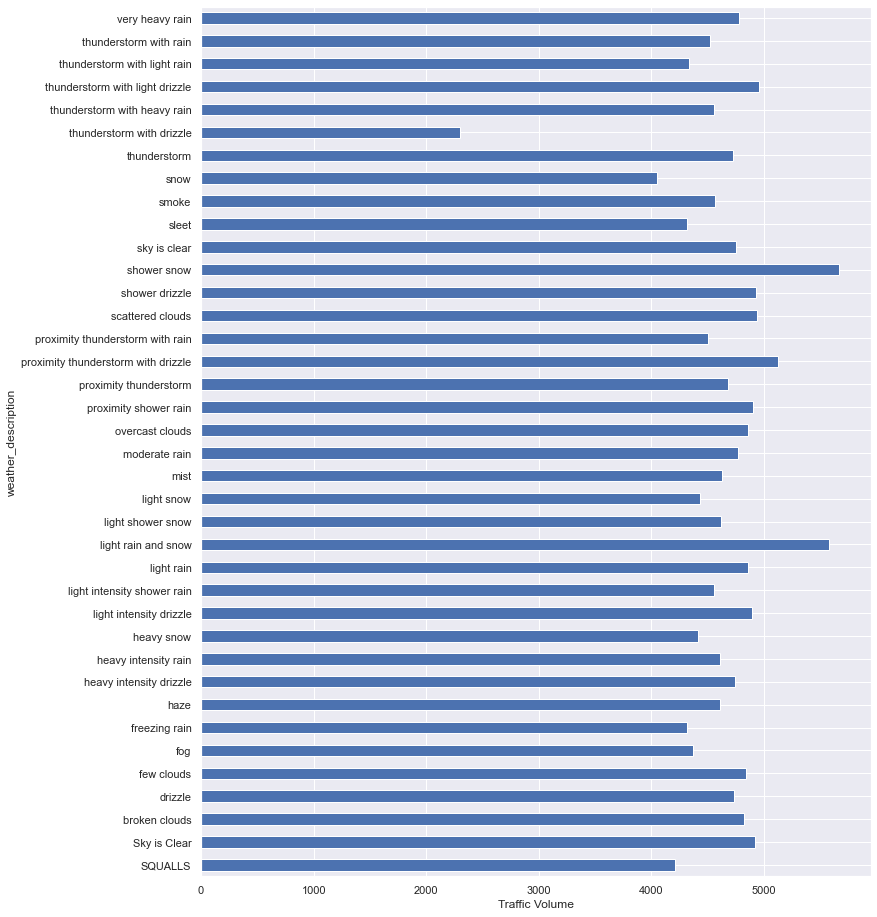

In [147]:
by_weather_description["traffic_volume"].plot.barh(figsize=(12,16))
plt.xlabel('Traffic Volume')
plt.show()

#### Shower Snow and Light Rain with Snow seem to be the weather descriptions accompanying the highest volumes of traffic recorded.

## Project Conclusion

#### Traffic is generally heavier for the months of March - October with the exception of summer vacation months where there is a sudden decrease perhaps owing to the closure of public schools. Traffic volume is significantly higher during the day time than at night, particularly on business days (Mondays - Fridays) specifically for the hours of 7:00am - 8:00am and 3:00pm - 5:00pm.

#### During Snowy and (or) Rainy / Thunderstorm weather the traffic volume recorded is highest and this is probably owing to the fact the such weather reduces the safe driving speed of cars on the roadway thus causing the flow of traffic itsefl to be reduced.